In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime,date
import numpy as np

In [2]:
df = pd.read_csv('../Data files/customer_shopping_data.csv')

In [3]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21-09-2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22-09-2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28-03-2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16-03-2021,Istinye Park


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


### Data Cleaning

In [5]:
df = df.drop(['invoice_no','customer_id'],axis=1)

In [6]:
df

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,Female,45,Souvenir,5,58.65,Credit Card,21-09-2022,Kanyon
99453,Male,27,Food & Beverage,2,10.46,Cash,22-09-2021,Forum Istanbul
99454,Male,63,Food & Beverage,2,10.46,Debit Card,28-03-2021,Metrocity
99455,Male,56,Technology,4,4200.00,Cash,16-03-2021,Istinye Park


In [7]:
df['gender'] = df['gender'].map({'Female':0,'Male':1})

In [8]:
df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,0,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,1,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,1,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,0,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,0,53,Books,4,60.60,Cash,24-10-2021,Kanyon


In [9]:
df = df.rename(columns={'payment_method':'method','invoice_date':'date','shopping_mall':'mall'})

In [10]:
df.head()

,gender,age,category,quantity,price,method,date,mall
0,0,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon
1,1,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul
2,1,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity
3,0,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM
4,0,53,Books,4,60.60,Cash,24-10-2021,Kanyon


In [11]:
def dateCleaner(date):
    date = str(date)
    date = datetime.strptime(date,'%d-%m-%Y')
    return date

In [12]:
df['date']=df['date'].map(dateCleaner)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   gender    99457 non-null  int64         
 1   age       99457 non-null  int64         
 2   category  99457 non-null  object        
 3   quantity  99457 non-null  int64         
 4   price     99457 non-null  float64       
 5   method    99457 non-null  object        
 6   date      99457 non-null  datetime64[ns]
 7   mall      99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 6.1+ MB


In [14]:
df.head()

,gender,age,category,quantity,price,method,date,mall
0,0,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,1,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,1,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,0,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,0,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [15]:
df['method'].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [16]:
df['mall'].unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

### Analysis On Data

#####  1. Show each age group uses of payment method
##### 2. Sum of money after selling product in each mall.
##### 3. which age group buy what product the most.
##### 4. what female buy the most
##### 5. what male buy the most
##### 6. Trending payment method over the year 
##### 7. which age group spend more money 

### 1. Show each age group uses of payment method

In [17]:
bins=np.array([18,25,35,50,70])

In [18]:
data = df[['age','method']]

In [19]:
data["ageBucket"] = pd.cut(data.age, bins)

C:\Users\ramas\AppData\Local\Temp\ipykernel_16680\292646235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ageBucket"] = pd.cut(data.age, bins)


In [20]:
total_customer_in_bucket = data.groupby(['ageBucket']).count()['age'].to_list()

In [21]:
customer_in_bucket = data.groupby(['ageBucket','method']).count()['age'].to_list()

In [22]:
data = data.groupby(['ageBucket','method']).count()

In [23]:
count = 0
index = 0 
per = []

for i in range(0,4,1):
    for j in range(0,3,1):
        per_val = customer_in_bucket[index]*100/total_customer_in_bucket[count]
        per.append(round(per_val,2))
        index = index + 1  
    count = count + 1
 

In [24]:
data['methodPercentage'] = per

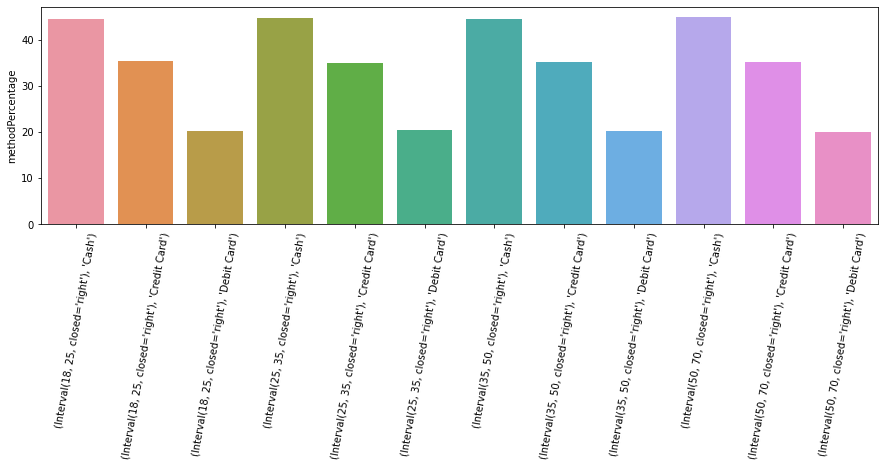

In [25]:
plt.figure(figsize=(15,4))
sns.barplot(data=data,y='methodPercentage',x=data.index.values)
plt.xticks(rotation=80)
plt.show()

It is quite suprising we can observe a pattern from the above, it means that the percentage of using each payment method is almost same in each age group. 

### 2.Sum of money after selling product in each mall.

In [26]:
data = df.groupby(['mall']).sum().sort_values(by='price',ascending=False)

<AxesSubplot:ylabel='price'>

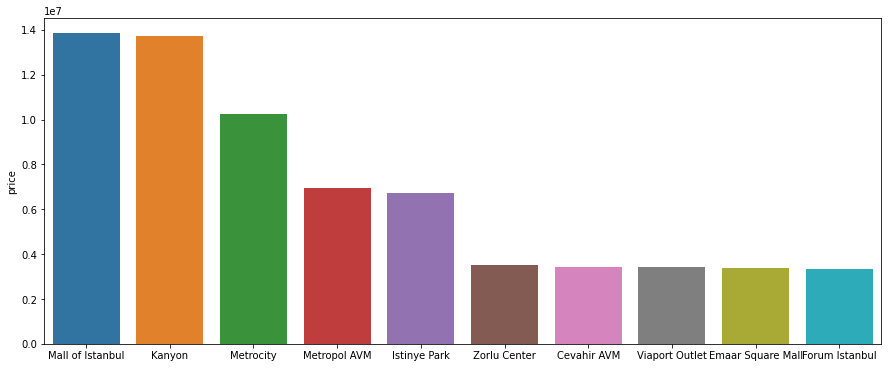

In [27]:
plt.figure(figsize=(15,6))
sns.barplot(data=data,x=data.index.values,y='price')

In [28]:
df

,gender,age,category,quantity,price,method,date,mall
0,0,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,1,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,1,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,0,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,0,53,Books,4,60.60,Cash,2021-10-24,Kanyon
...,...,...,...,...,...,...,...,...
99452,0,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon
99453,1,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul
99454,1,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity
99455,1,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park


In [29]:
data =df[['age','category']]

In [30]:
data["ageBucket"] = pd.cut(data.age, bins)

C:\Users\ramas\AppData\Local\Temp\ipykernel_16680\292646235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ageBucket"] = pd.cut(data.age, bins)


In [31]:
data.head()

,age,category,ageBucket
0,28,Clothing,"(25, 35]"
1,21,Shoes,"(18, 25]"
2,20,Clothing,"(18, 25]"
3,66,Shoes,"(50, 70]"
4,53,Books,"(50, 70]"


In [32]:
data.groupby(['ageBucket','category'])['category'].count().to_frame('count').sort_values(by=['ageBucket','count'],ascending=False).reset_index()

,ageBucket,category,count
0,"(50, 70]",Clothing,12472
1,"(50, 70]",Cosmetics,5547
2,"(50, 70]",Food & Beverage,5346
3,"(50, 70]",Shoes,3654
4,"(50, 70]",Toys,3644
5,"(50, 70]",Books,1830
6,"(50, 70]",Souvenir,1826
7,"(50, 70]",Technology,1782
8,"(35, 50]",Clothing,10064
9,"(35, 50]",Cosmetics,4379


In [33]:
unique_age = list(data['ageBucket'].unique())

In [34]:
unique_age

[Interval(25.0, 35.0, closed='right'),
 Interval(18.0, 25.0, closed='right'),
 Interval(50.0, 70.0, closed='right'),
 Interval(35.0, 50.0, closed='right'),
 nan]

In [35]:
plot_df1 = data[data['ageBucket']==unique_age[0]].groupby('category')['age'].count().to_frame('count').sort_values(by='count',ascending=False)
plot_df2 = data[data['ageBucket']==unique_age[1]].groupby('category')['age'].count().to_frame('count').sort_values(by='count',ascending=False)
plot_df3 = data[data['ageBucket']==unique_age[2]].groupby('category')['age'].count().to_frame('count').sort_values(by='count',ascending=False)
plot_df4 = data[data['ageBucket']==unique_age[3]].groupby('category')['age'].count().to_frame('count').sort_values(by='count',ascending=False)


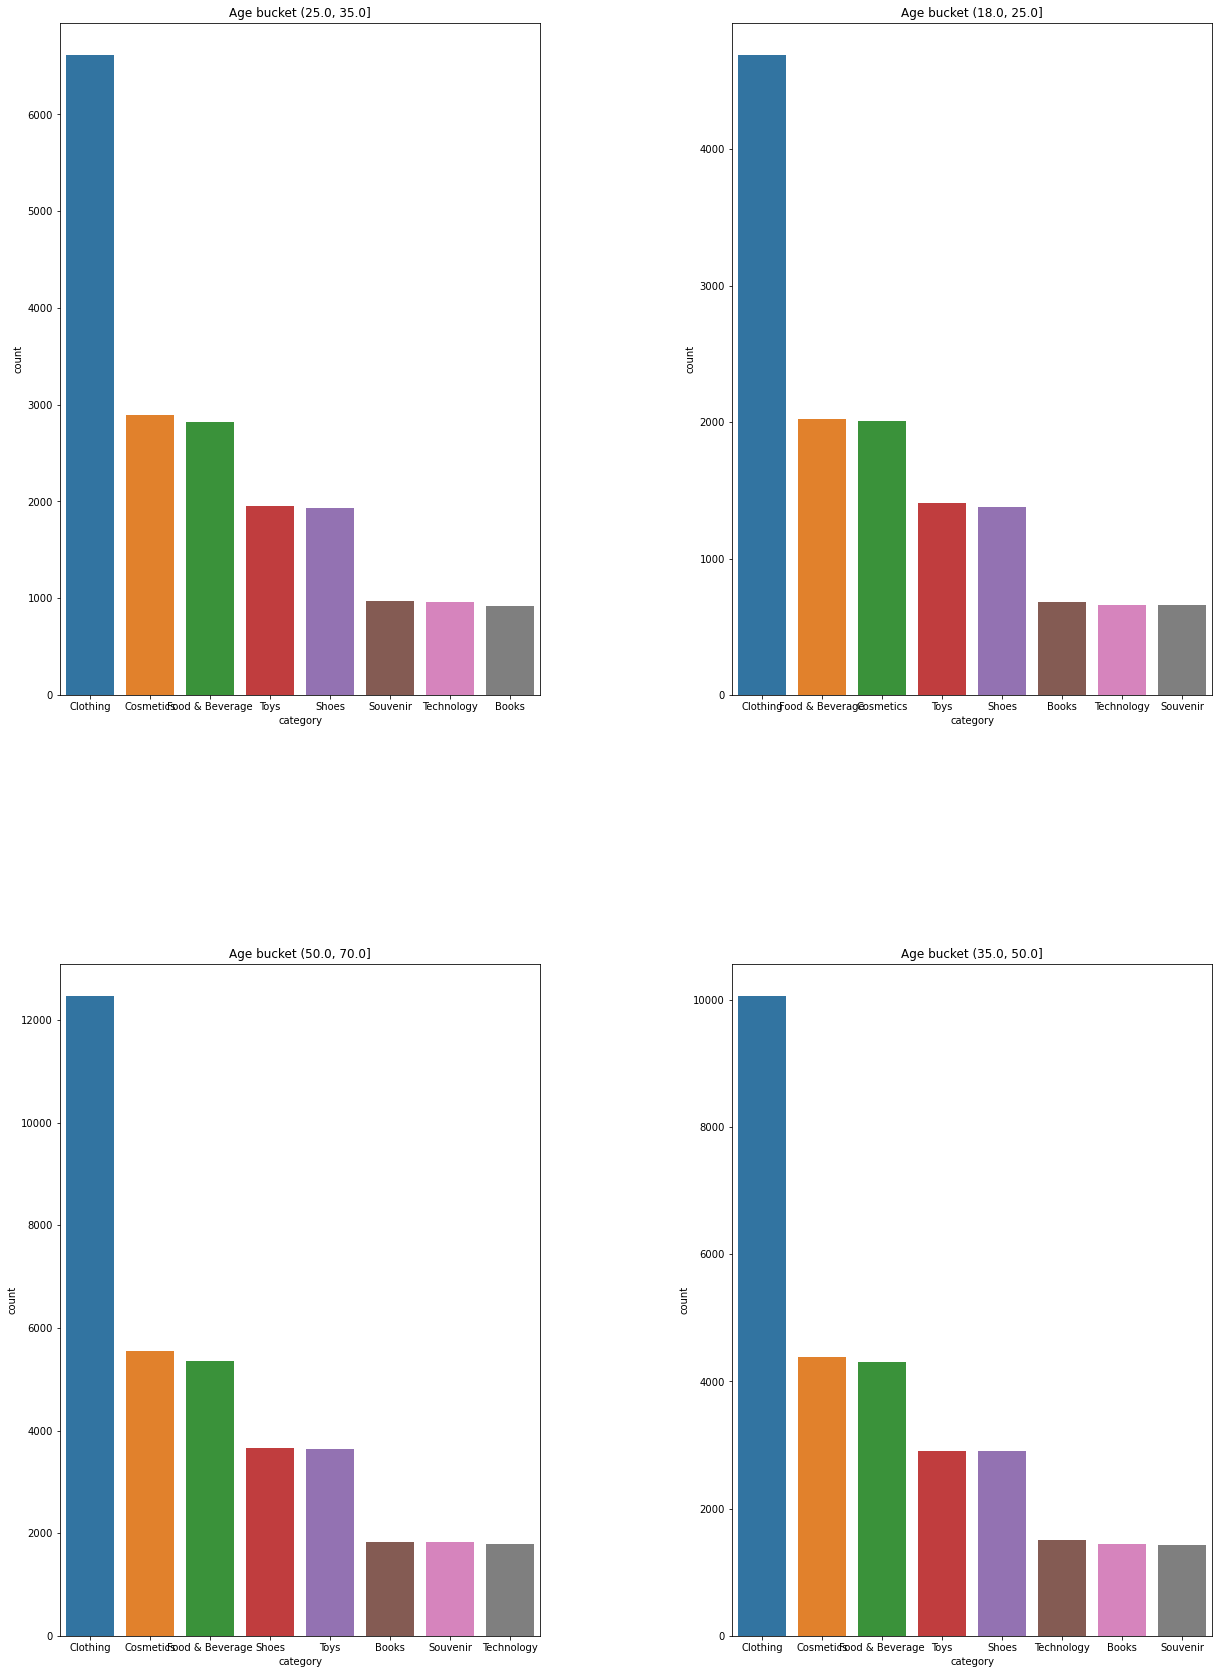

In [36]:
fig, ax = plt.subplots(2,2, figsize=(20,28))
plt.rcParams["figure.autolayout"] = True
sns.barplot(data=plot_df1,y='count',x=plot_df1.index,ax=ax[0,0])
ax[0,0].title.set_text("Age bucket "+str(unique_age[0]))
sns.barplot(data=plot_df2,y='count',x=plot_df2.index,ax=ax[0,1])
ax[0,1].title.set_text("Age bucket "+str(unique_age[1]))
sns.barplot(data=plot_df3,y='count',x=plot_df3.index, ax=ax[1,0])
ax[1,0].title.set_text("Age bucket "+str(unique_age[2]))
sns.barplot(data=plot_df4,y='count',x=plot_df4.index, ax=ax[1,1])
ax[1,1].title.set_text("Age bucket "+str(unique_age[3]))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

plt.show()


In [58]:
plot_df4

,count
category,
Clothing,10064
Cosmetics,4379
Food & Beverage,4304
Toys,2910
Shoes,2902
Technology,1501
Books,1443
Souvenir,1435


In above graph how much each age group spent money on each category is shown. Thus we can see that mostly mall earn money by selling closthes and cosmetics.

Age group (25-35) spent 6614 doller , age group (18-25) spent 4691 doller, age group (50-70) spent 12472 doller and age group (35-50) spent 10064.

In [37]:
data = df[['gender','category']]

In [38]:
data.groupby(['gender','category'])['category'].count()

gender  category       
0       Books               2906
        Clothing           20652
        Cosmetics           9070
        Food & Beverage     8804
        Shoes               5967
        Souvenir            3017
        Technology          2981
        Toys                6085
1       Books               2075
        Clothing           13835
        Cosmetics           6027
        Food & Beverage     5972
        Shoes               4067
        Souvenir            1982
        Technology          2015
        Toys                4002
Name: category, dtype: int64

In [39]:
plot_df = data[data['gender']==0]

In [40]:
plot_df = plot_df.groupby('category').count().sort_values(by='gender',ascending=False)

In [41]:
plot_df

,gender
category,
Clothing,20652
Cosmetics,9070
Food & Beverage,8804
Toys,6085
Shoes,5967
Souvenir,3017
Technology,2981
Books,2906


<AxesSubplot:title={'center':'Female'}, xlabel='category'>

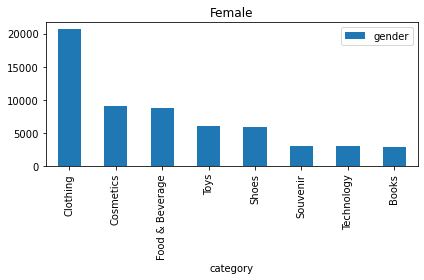

In [42]:
plot_df.plot.bar(y='gender',use_index=True,title="Female")

This shows that female mostly bought clothes from the mall followed by cosmetics.

### 5.what male customer buy the most

<AxesSubplot:title={'center':'Male'}, xlabel='category'>

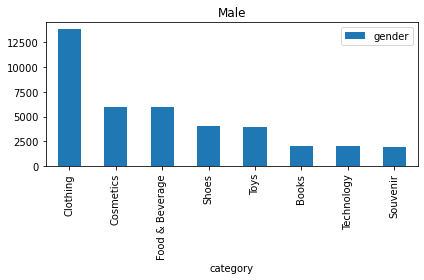

In [43]:
plot_df = data[data['gender']==1]
plot_df = plot_df.groupby('category').count().sort_values(by='gender',ascending=False)
plot_df.plot.bar(y='gender',use_index=True,title="Male")

We can observe same in this grapgh as well for male.Male has also mostly bouth clothes and cosmetics.

 ### 6.Trending payment method over the year

In [46]:
data = df.groupby(['date','method'])['method'].count().to_frame('count').reset_index()

In [47]:
data

,date,method,count
0,2021-01-01,Cash,51
1,2021-01-01,Credit Card,39
2,2021-01-01,Debit Card,15
3,2021-01-02,Cash,62
4,2021-01-02,Credit Card,43
...,...,...,...
2386,2023-03-07,Credit Card,38
2387,2023-03-07,Debit Card,24
2388,2023-03-08,Cash,51
2389,2023-03-08,Credit Card,44


<AxesSubplot:xlabel='date', ylabel='count'>

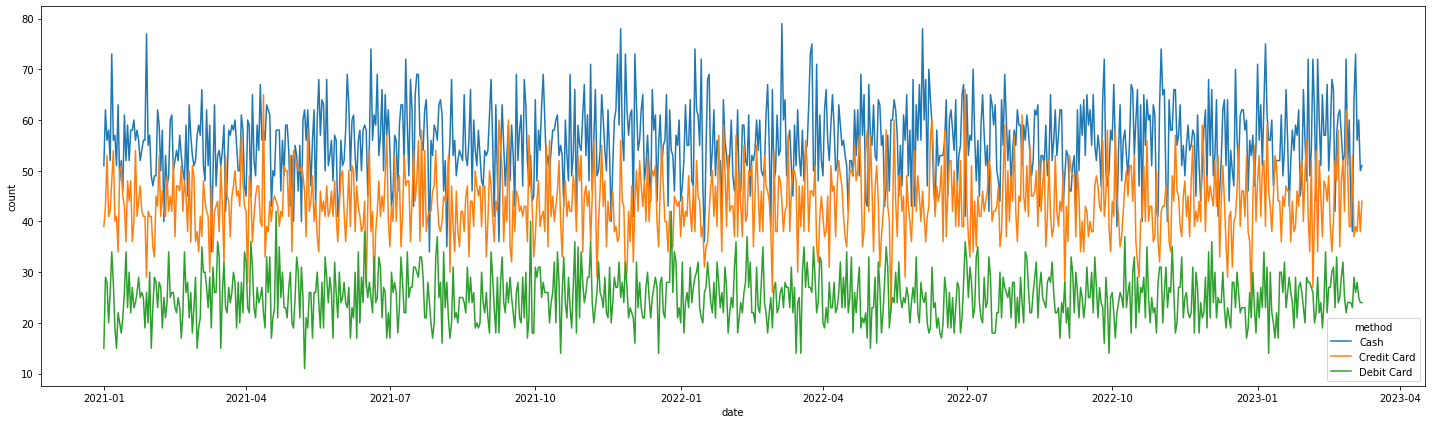

In [48]:
plt.figure(figsize=(20,6))
sns.lineplot(data=data,x='date',y='count',hue='method')

We can see from above graph that not much has changed in payment method over the year.

In [49]:
data = df[['age','price']]

In [50]:
data["ageBucket"] = pd.cut(data.age, bins)

C:\Users\ramas\AppData\Local\Temp\ipykernel_16680\292646235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ageBucket"] = pd.cut(data.age, bins)


In [51]:
data

,age,price,ageBucket
0,28,1500.40,"(25, 35]"
1,21,1800.51,"(18, 25]"
2,20,300.08,"(18, 25]"
3,66,3000.85,"(50, 70]"
4,53,60.60,"(50, 70]"
...,...,...,...
99452,45,58.65,"(35, 50]"
99453,27,10.46,"(25, 35]"
99454,63,10.46,"(50, 70]"
99455,56,4200.00,"(50, 70]"


In [52]:
data = data.groupby('ageBucket')['price'].sum().to_frame('total').sort_values('total',ascending=False)

<AxesSubplot:title={'center':'Money spent by each age group'}, xlabel='ageBucket'>

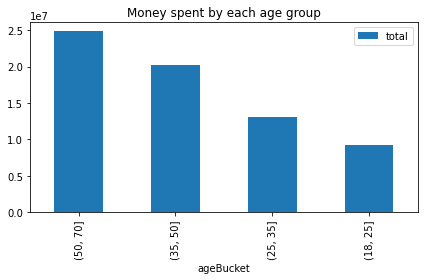

In [54]:
data.plot.bar(y='total',use_index=True,title="Money spent by each age group")

We can see in above graph that age group (50,70) has spent the most money. 